In [2]:
#importing the libraries that I will use for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df  = pd.read_csv("C:\\Users\\Gacheru\\Documents\\Pyscripts DS\\Tip-prediction\\tips.csv")
#dropping the coloumns I am not interested in

mydata = df.drop(['size','Payer Name','CC Number','Payment ID'],axis=1)

In [4]:
#reaarranging the data
mydata = mydata[['tip','total_bill','sex','smoker','day','price_per_person']]

In [5]:
mydata

,tip,total_bill,sex,smoker,day,price_per_person
0,1.01,16.99,Female,No,Sun,8.49
1,1.66,10.34,Male,No,Sun,3.45
2,3.50,21.01,Male,No,Sun,7.00
3,3.31,23.68,Male,No,Sun,11.84
4,3.61,24.59,Female,No,Sun,6.15
...,...,...,...,...,...,...
239,5.92,29.03,Male,No,Sat,9.68
240,2.00,27.18,Female,Yes,Sat,13.59
241,2.00,22.67,Male,Yes,Sat,11.34
242,1.75,17.82,Male,No,Sat,8.91


,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


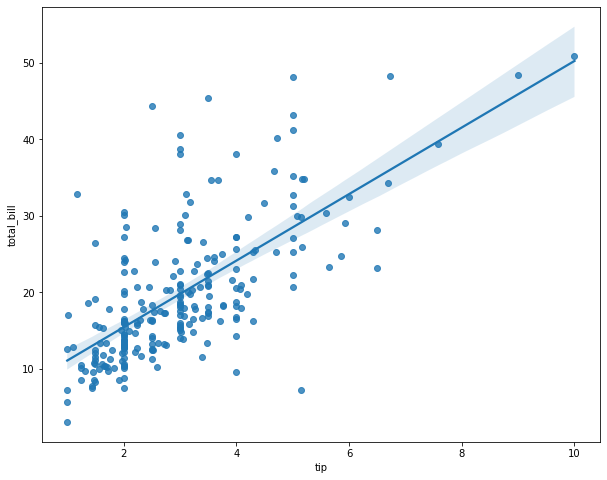

In [6]:
#we can start the vizualization aspect of the data
# let us check the correlation of tip and total_bill using a scatter plot
#The regplot() function of the Seaborn library is definitely the best way to build a scatterplot in minutes.
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=mydata["tip"], y=mydata["total_bill"])

#cheking the correlation between the total bill and tips
mydata['total_bill'].corr(mydata['tip'])

#there is a positive correlation between the total bill and tips, and since it measure both direction and magnitude
#we find that there exists a strong correlation between the data
# let us look at the covariance of the data - 
mydata[['total_bill','tip']].cov()


In [7]:
#covariance of the data is positive and high meaning that the data is moving in the same direction as cov measures direction
mydata.total_bill.cov(mydata.tip)

8.323501629224854

<AxesSubplot:xlabel='day', ylabel='total_bill'>

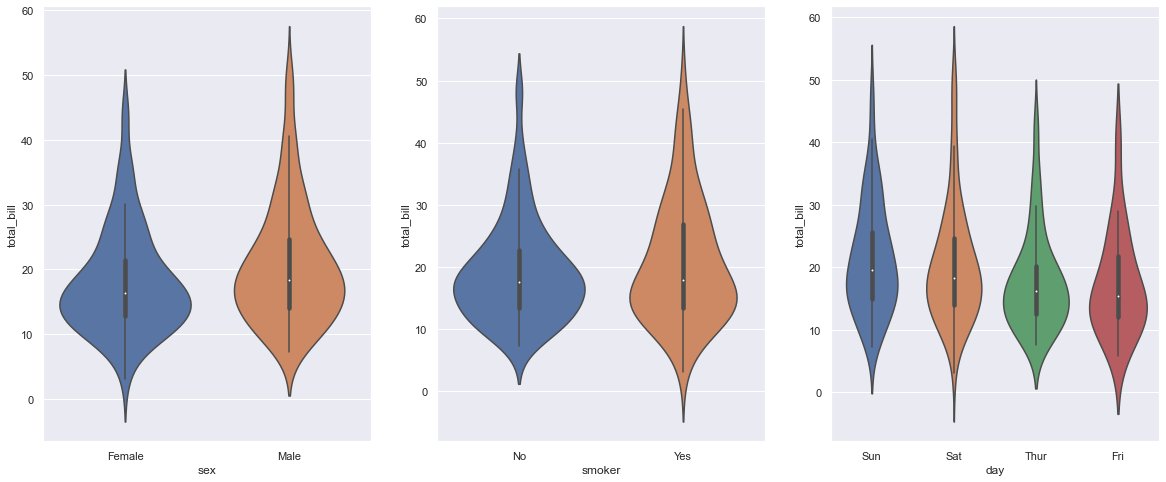

In [12]:
#we can look at a distribution chartv for the sexes, smokers, day and time
#violin of the total bill and the distribution among sex, days and whether smoker or not
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 3)
#changing the size of the plots
sns.set(rc = {'figure.figsize':(20,10)})

#violin plot 
sns.violinplot(x=mydata["sex"], y=mydata["total_bill"],ax=axes[0])
sns.violinplot(x=mydata["smoker"], y=mydata["total_bill"],ax=axes[1])
sns.violinplot(x=mydata["day"], y=mydata["total_bill"],ax=axes[2])

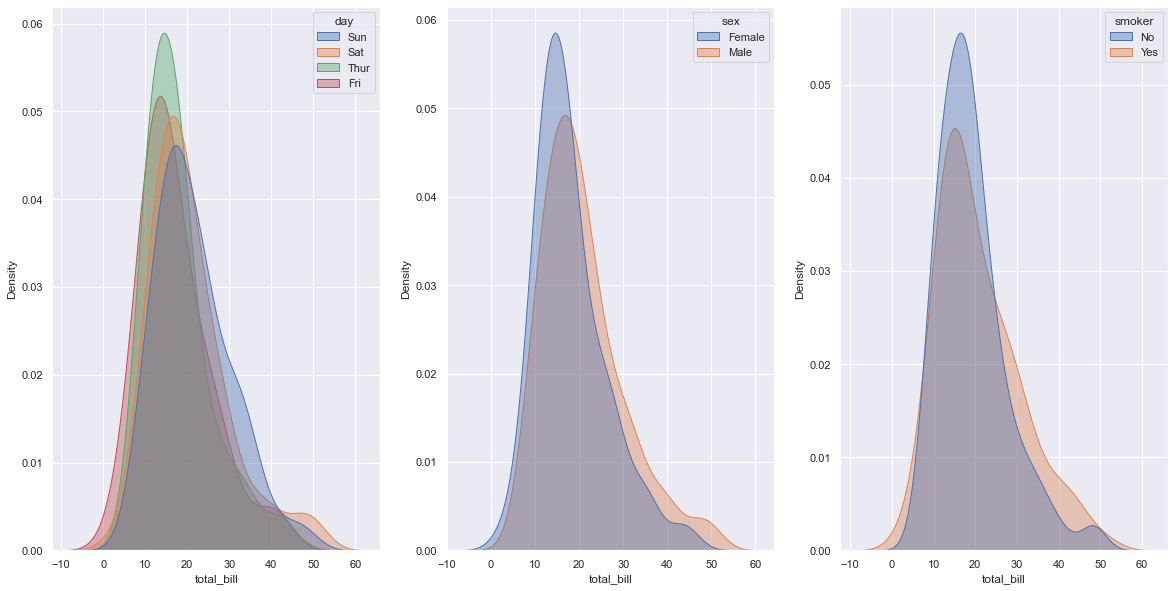

In [26]:
#kde plot showing the hue as day, smoker and gender
fig, axes = plt.subplots(1, 3)
sns.kdeplot(data=mydata, x="total_bill", hue="day", fill=True, common_norm=False, alpha=0.4,ax=axes[0])
sns.kdeplot(data=mydata, x="total_bill", hue="sex", fill=True, common_norm=False, alpha=0.4,ax=axes[1])
sns.kdeplot(data=mydata, x="total_bill", hue="smoker", fill=True, common_norm=False, alpha=0.4,ax=axes[2])

plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

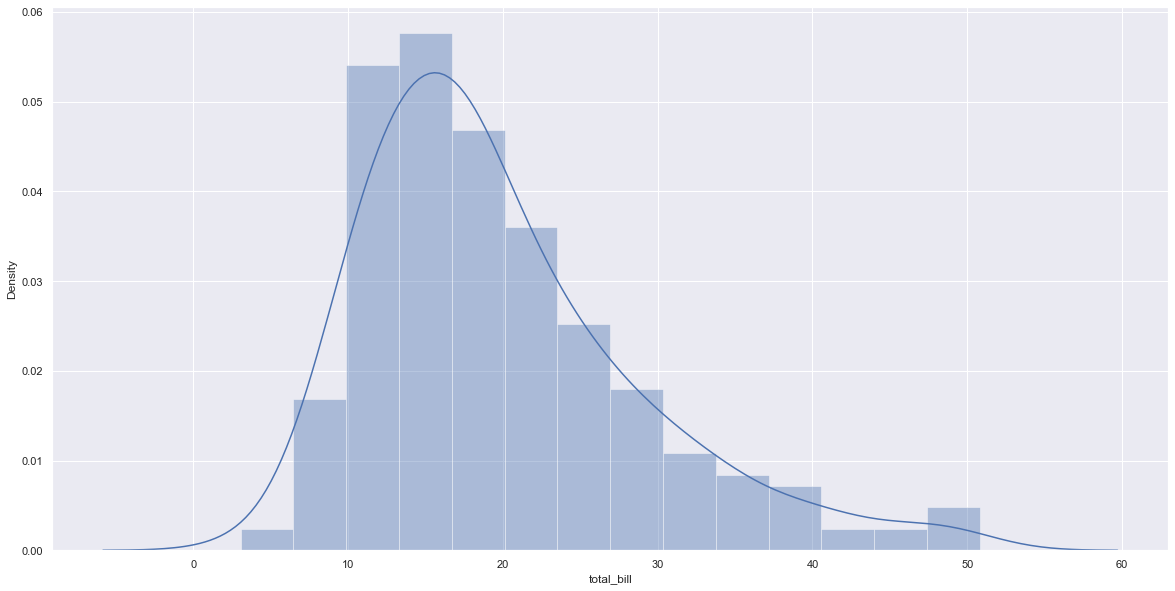

In [30]:
#histogram of the total bill distribution
sns.distplot( a=mydata["total_bill"], hist=True, kde=True, rug=False )

C:\Users\Gacheru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

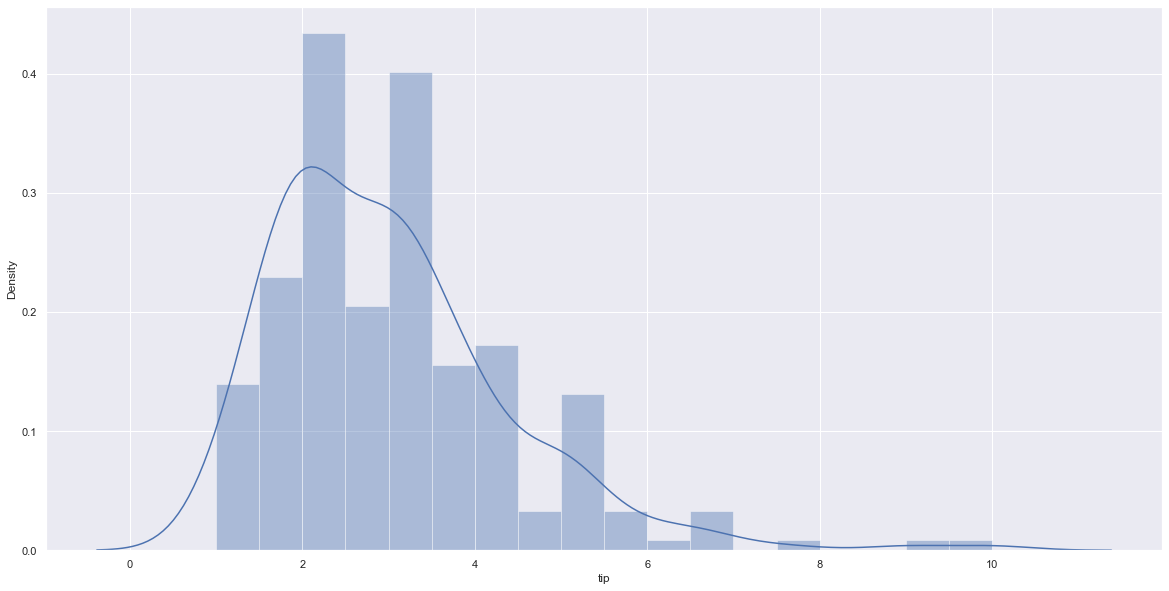

In [31]:

#histo gram of the tip distribution
sns.distplot( a=mydata["tip"], hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='price_per_person', ylabel='Count'>

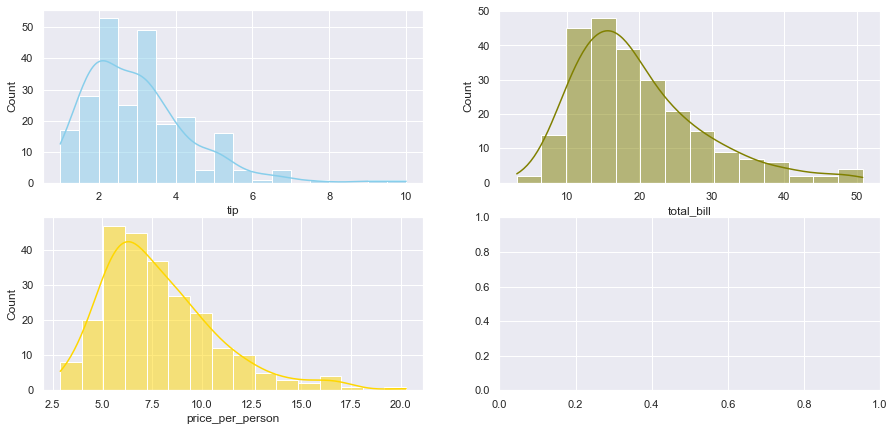

In [34]:
#Splitting the figure in as much axes as needed
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

sns.histplot(data=mydata, x="tip", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=mydata, x="total_bill", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=mydata, x="price_per_person", kde=True, color="gold", ax=axs[1, 0])


<AxesSubplot:xlabel='smoker', ylabel='tip'>

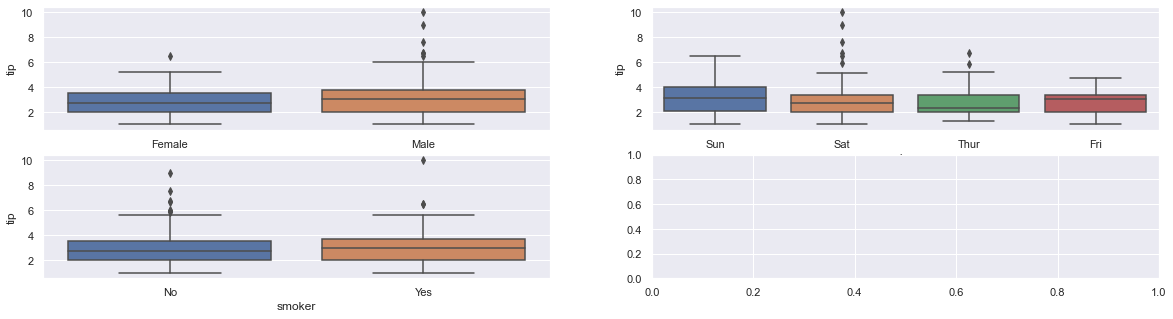

In [54]:
#A boxplot summarizes the distribution of a numeric variable for one or several groups. 
#It allows to quickly get the median, quartiles and outliers but also hides the dataset individual data points. 
#In python, boxplots are most of time done thanks to the boxplot function of the Seaborn library.
fig, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(20,10)})

#create boxplot in each subplot
sns.boxplot(data=mydata, x='sex', y='tip', ax=axes[0,0])
sns.boxplot(data=mydata, x='day', y='tip', ax=axes[0,1])
sns.boxplot(data=mydata, x='smoker', y='tip', ax=axes[1,0])
#sns.boxplot(data=mydata, x='total_bill', y='tip', ax=axes[1,1])

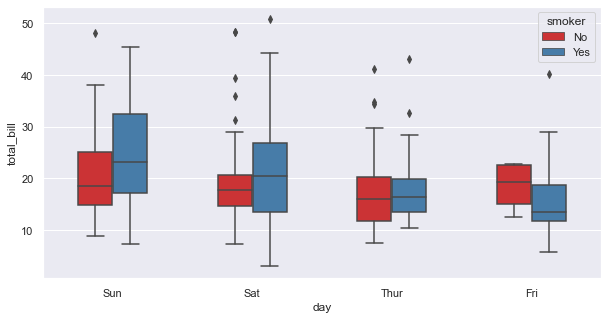

In [61]:
#Grouped boxplots are used when you have a numerical variable, several groups and subgroups 
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x="day", y="total_bill", hue="smoker", data=mydata, palette="Set1", width=0.5)
plt.show()

In [78]:
mydata


,tip,total_bill,sex,smoker,day,price_per_person,mean_day
0,1.01,16.99,Female,No,Sun,8.49,3.255132
1,1.66,10.34,Male,No,Sun,3.45,3.255132
2,3.50,21.01,Male,No,Sun,7.00,3.255132
3,3.31,23.68,Male,No,Sun,11.84,3.255132
4,3.61,24.59,Female,No,Sun,6.15,3.255132
...,...,...,...,...,...,...,...
239,5.92,29.03,Male,No,Sat,9.68,2.993103
240,2.00,27.18,Female,Yes,Sat,13.59,2.993103
241,2.00,22.67,Male,Yes,Sat,11.34,2.993103
242,1.75,17.82,Male,No,Sat,8.91,2.993103


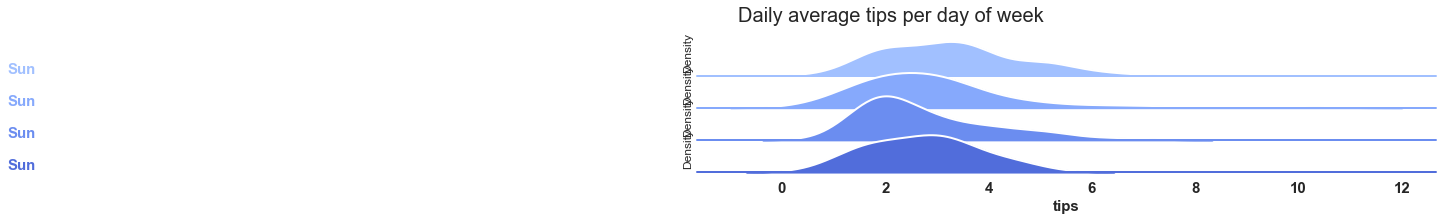

In [77]:
#A Ridgelineplot (formerly called a Joyplot) allows to study the distribution of a numeric variable for several groups.
# we generate a color palette with Seaborn.color_palette()

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot)
#and we create a new column in temp dataframe

day_mean_serie = mydata.groupby('day')['tip'].mean()
mydata['mean_day'] = mydata['day'].map(day_mean_serie)
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(mydata, row='day', hue='mean_day', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'tip',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'tip', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, mydata['day'][i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('tips', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average tips per day of week',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

In [65]:
mydata

,tip,total_bill,sex,smoker,day,price_per_person,mean_day
0,1.01,16.99,Female,No,Sun,8.49,3.255132
1,1.66,10.34,Male,No,Sun,3.45,3.255132
2,3.50,21.01,Male,No,Sun,7.00,3.255132
3,3.31,23.68,Male,No,Sun,11.84,3.255132
4,3.61,24.59,Female,No,Sun,6.15,3.255132
...,...,...,...,...,...,...,...
239,5.92,29.03,Male,No,Sat,9.68,2.993103
240,2.00,27.18,Female,Yes,Sat,13.59,2.993103
241,2.00,22.67,Male,Yes,Sat,11.34,2.993103
242,1.75,17.82,Male,No,Sat,8.91,2.993103
